# Protection of customers' personal data

There is data from insurance company customers on which predictions are made.

It is required to convert them into a format from which it will be difficult to extract personal information.

At the same time, the quality of machine learning models should not drop.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.ticker import MaxNLocator

import sklearn
from sklearn import metrics, model_selection, preprocessing, tree, linear_model, ensemble
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
np.random.seed(57)

## Data description

In [3]:
try:
    data = pd.read_csv('insurance.csv')
except:
    data = pd.read_csv('/datasets/insurance.csv')

In [4]:
data

,Gender,Age,Salary,Family members,Insurance payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


Here the target attribute (insurance payments) reflects the number of insurance payments to the client in the last 5 years.

In [5]:
data.nunique()

Gender                  2
Age                    46
Salary                524
Family members          7
Insurance payments      6
dtype: int64

In [6]:
def barplot_from_counts(series):
    series.index = series.index.map(str)
    legend = []
    for row in range(len(series)):
        legend.append(mpatches.Patch(
            color=plt.colormaps.get_cmap('Set1').colors[row], 
            label='{}: {}'.format(series.index[row], series.iloc[row])))
    fig, ax = plt.subplots()
    plt.bar(x=series.index, 
            height=series.values, 
            color=plt.colormaps.get_cmap('Set1').colors)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(series.name)
    plt.legend(handles=legend)
    plt.show()

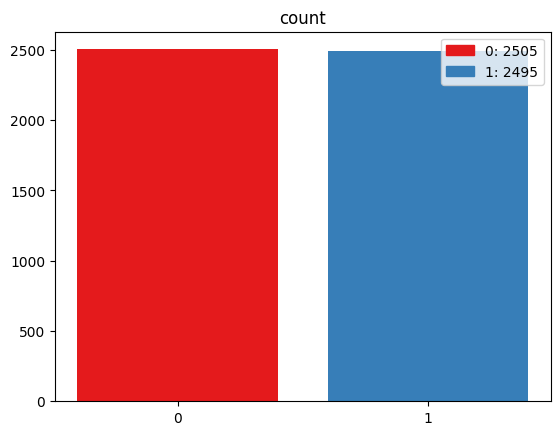

In [7]:
gender = data['Gender'].value_counts()
barplot_from_counts(data['Gender'].value_counts())

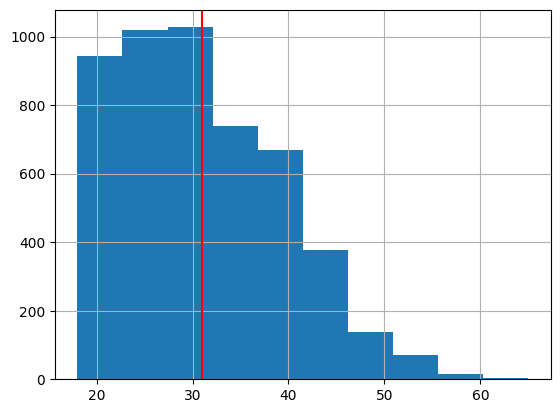

In [8]:
data['Age'].hist()
plt.axvline(x=data['Age'].mean(), color='red')
plt.show()

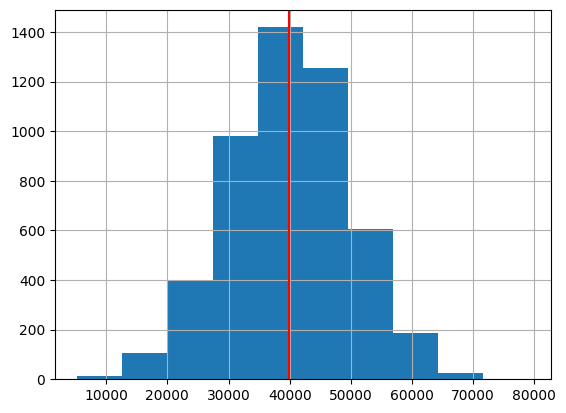

In [9]:
data['Salary'].hist()
plt.axvline(x=data['Salary'].mean(), color='red')
plt.show()

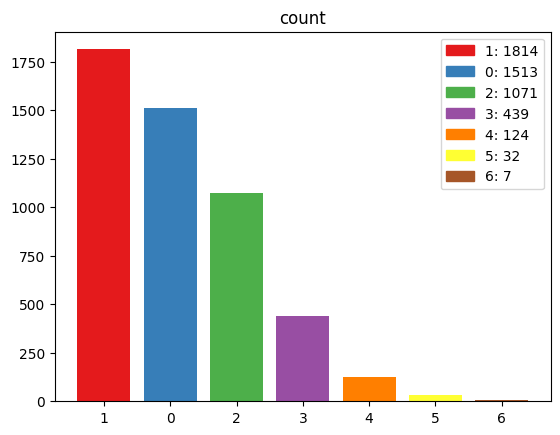

In [10]:
family = data['Family members'].value_counts()
barplot_from_counts(family)

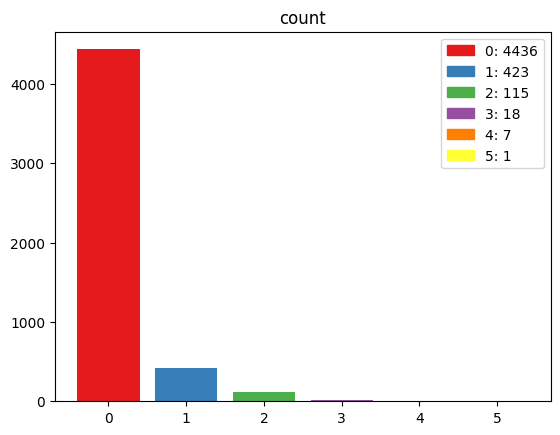

In [11]:
payments = data['Insurance payments'].value_counts()
barplot_from_counts(payments)

## Missing values and duplicates

In [12]:
data.isna().sum()

Gender                0
Age                   0
Salary                0
Family members        0
Insurance payments    0
dtype: int64

In [13]:
data[data.duplicated()]

,Gender,Age,Salary,Family members,Insurance payments
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


In [14]:
data[data['Salary'] == 48100.0]

,Gender,Age,Salary,Family members,Insurance payments
69,1,39.0,48100.0,1,0
281,1,39.0,48100.0,1,0
434,1,32.0,48100.0,2,0
717,1,27.0,48100.0,3,0
906,0,27.0,48100.0,0,0
1081,1,42.0,48100.0,0,1
1263,0,44.0,48100.0,0,1
1279,0,44.0,48100.0,3,1
1706,0,29.0,48100.0,3,0
1763,1,29.0,48100.0,2,0


More of a coincidence than duplicates.

## Selection functions

Since the task is sampling and not training, we will describe the training procedure by functions.

In [15]:
def test_LinearRegression(features_train, features_test, target_train, target_test):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    
    return r2_score(target_test, predictions)

In [16]:
def test_DecisionTreeRegressor(features_train, features_test, target_train, target_test):
    model = DecisionTreeRegressor()
    params = {'max_depth': range(1, 30, 3)}
    tree = GridSearchCV(model, params, cv=10, scoring='r2')
    tree.fit(features_train, target_train)
    predictions = tree.best_estimator_.predict(features_test)
    
    print(tree.best_params_)
    return r2_score(target_test, predictions)

In [17]:
def test_RandomForestRegressor(features_train, features_test, target_train, target_test):
    model = RandomForestRegressor()
    params = {'max_depth': range(1, 30, 7), 'n_estimators': range(1, 202, 50)}
    forest = GridSearchCV(model, params, cv=5, scoring='r2')
    forest.fit(features_train, target_train)
    predictions = forest.best_estimator_.predict(features_test)
    
    # print(np.unique(predictions))
    print(forest.best_params_)
    return r2_score(target_test, predictions)

## Initial data

In [18]:
data

,Gender,Age,Salary,Family members,Insurance payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


Let's separate the target feature.

In [19]:
features = data.drop('Insurance payments', axis=1)
target = data['Insurance payments']

In [20]:
features.head()

,Gender,Age,Salary,Family members
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [21]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Insurance payments, dtype: int64

## Multiplication by an invertible matrix

### Theory

The linear regression prediction $y$ is calculated as

$y = (x, w) + w_0 = \sum \limits_{i=1}^{n} w_ix_i + w_0$

где 
- n – number of features
- x – vector of features of the predicted object
- w – vector of linear regression coefficients
- w_0 – bias

$ x = 
\begin{pmatrix}
x_1 \\
x_2 \\
... \\
x_n
\end{pmatrix}, 
w = 
\begin{pmatrix}
w_1 \\
w_2 \\
... \\
w_n
\end{pmatrix}
$

Suppose we predict k objects during training. Then the set of predictions k

$
\begin{cases}
y_1 = (x_1, w) + w_0 = \sum \limits_{i=1}^{n} w_{i}x_{1i} + w_0 \\
y_2 = (x_2, w) + w_0 = \sum \limits_{i=1}^{n} w_{i}x_{2i} + w_0 \\
... \\
y_k = (x_k, w) + w_0 = \sum \limits_{i=1}^{n} w_{i}x_{ki} + w_0
\end{cases}
$

can be written as a matrix

$
\begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_k
\end{pmatrix}
 = 
\begin{pmatrix}
x_{11} & x_{12} & ... & x_{1n} \\
x_{21} & x_{22} & ... & x_{2n} \\
... & ... & ... & ...\\
x_{k1} & x_{k2} & ... & x_{kn}
\end{pmatrix}
\begin{pmatrix}
w_1 \\
w_2 \\
... \\
w_n 
\end{pmatrix}
 + 
 \begin{pmatrix}
w_0 \\
w_0 \\
... \\
w_0 
\end{pmatrix}
$

for short

$y = Xw + w_0$

During training, the vector of weights is calculated as

$ 
w = (X^TX)^{-1}X^Ty
$

And in the case of multiplication by the matrix $P$

$
w_p = ((XP)^TXP)^{-1}(XP)^Ty
$

If we express one through the other, we get

$
w = (X^TX)^{-1}X^Ty \\
w_p = ((XP)^TXP)^{-1}(XP)^Ty = (P^TX^TXP)^{-1}P^TX^Ty = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty = P^{-1}(X^TX)^{-1}EX^Ty = P^{-1}(X^TX)^{-1}X^Ty = P^{-1}w
$

Since the predictions are calculated as $y = Xw + w_0$, then for training on the updated features we receive that 

$y_p = XPw_p + w_0 = XPP^{-1}w + w_0 = XEw + w_0 = Xw + w_0 = y$.

So, in theory, the quality won't change.

### Algorithm

Thus, the conversion algorithm is as follows:

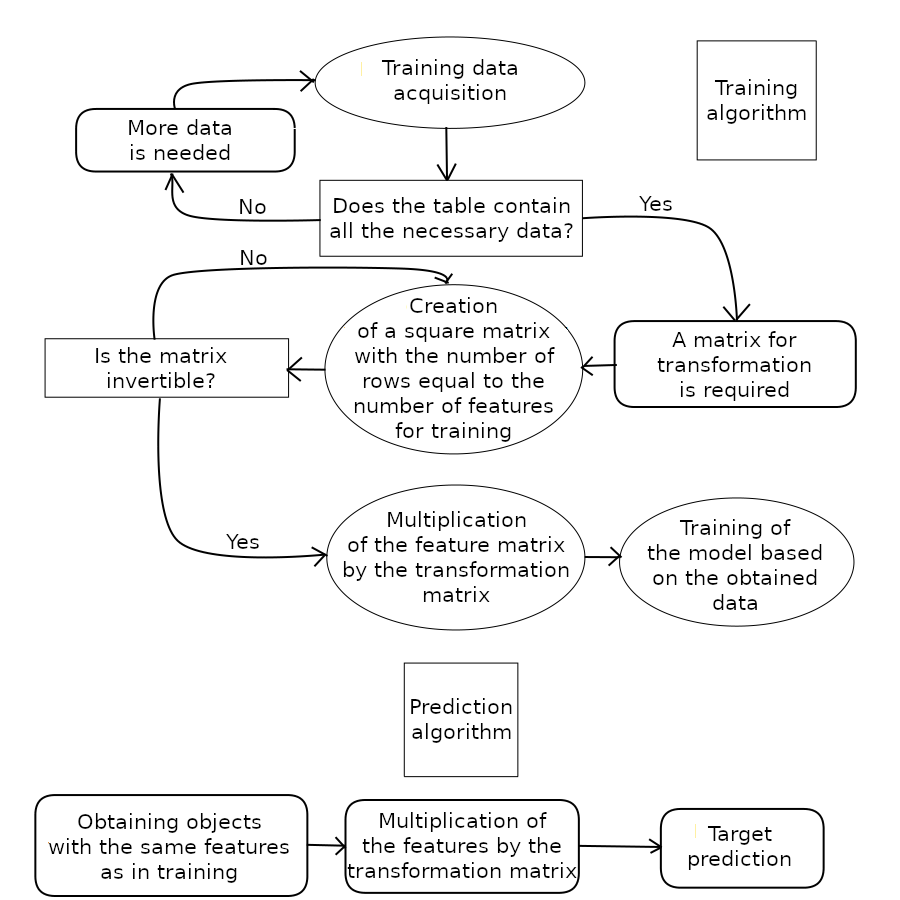

If we create a pair of two inverse matrices, we can multiply the features by one of them and use the second one as a key to get the initial data.

In [22]:
def get_rand_matrix():
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(features.shape[1], features.shape[1]))
        det = np.linalg.det(matrix)
    return matrix
A = get_rand_matrix()
A

array([[-0.13105216, -0.2006461 , -1.69012289, -0.79441848],
       [ 1.52800166,  2.23640541, -2.61151195,  0.76600939],
       [ 1.74616801, -1.68913925, -0.26618848, -1.44891974],
       [-0.93826531, -0.07550096, -0.70175721, -0.16063802]])

In [23]:
A_inv = np.linalg.inv(A)
A_inv

array([[-0.44687662,  0.23647444,  0.36356486,  0.0583447 ],
       [ 3.57434848, -0.76252343, -1.79872547, -5.08858204],
       [ 1.34668722, -0.52493097, -0.7462739 , -2.43182951],
       [-4.95290828,  1.27036914,  1.98202326,  6.44930704]])

In [24]:
np.dot(A, A_inv)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.55271368e-15,  1.00000000e+00, -1.33226763e-15,
        -1.77635684e-15],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-8.88178420e-16,  2.77555756e-16,  3.88578059e-16,
         1.00000000e+00]])

The errors occur because Python stores a limited number of decimal places.

Here's what it looks like for real data:

In [25]:
features_new = np.dot(features, A)
features_new

array([[ 86671.51194447, -83689.89035268, -13312.41241067,
        -71835.96797909],
       [ 66423.73411286, -64084.49237316, -10235.99349528,
        -55023.87448204],
       [ 36713.84021494, -35407.06850476,  -5665.69189801,
        -30405.10035388],
       ...,
       [ 59223.77897175, -57217.24348743,  -9077.42317937,
        -49103.38041338],
       [ 57130.36404809, -55186.07972302,  -8765.611909  ,
        -47364.09975817],
       [ 70936.1358514 , -68516.71036801, -10882.76644755,
        -58805.64840422]])

In [26]:
np.dot(features_new, A_inv)

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-5.82076609e-11,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [ 0.00000000e+00,  2.90000000e+01,  2.10000000e+04,
         2.91038305e-11],
       ...,
       [ 0.00000000e+00,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

In [27]:
features_back = pd.DataFrame(np.dot(features_new, A_inv).round().astype(int), 
                             columns=features.columns)

In [28]:
features_back

,Gender,Age,Salary,Family members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0
...,...,...,...,...
4995,0,28,35700,2
4996,0,34,52400,1
4997,0,20,33900,2
4998,1,22,32700,3


In [29]:
(features_back == features.round().astype(int)).sum()

Gender            5000
Age               5000
Salary            5000
Family members    5000
dtype: int64

### Implementation

Let's describe the algorithm of transformation by a function.

In [30]:
def transform_features(features):
    length = features.shape[1]
    determinant = 0
    while determinant == 0:
        matrix = np.random.normal(size=(length, length))
        determinant = np.linalg.det(matrix)
    matrix_inv = np.linalg.inv(matrix)
    features_transformed = pd.DataFrame(np.dot(features, matrix), 
                                        columns=features.columns, 
                                        index=features.index)
    return features_transformed, matrix_inv

### Testing

Let's see if the prediction accuracy changes for such features.

In [31]:
features.head()

,Gender,Age,Salary,Family members
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [32]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=57)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3750, 4)
(1250, 4)
(3750,)
(1250,)


In [33]:
test_LinearRegression(features_train, features_test, target_train, target_test)

0.4007021387970914

It's the same with the altered ones.

In [34]:
features_new, matrix_inv = transform_features(features)
features_new = pd.DataFrame(features_new, columns=features.columns, index=features.index)
features_new.head()

,Gender,Age,Salary,Family members
0,31799.646425,55420.433989,7276.989275,57516.057474
1,24392.097980,42452.596726,5590.386862,44073.767191
2,13486.920708,23459.794411,3094.203954,24358.729360
3,26708.174474,46598.239652,6101.904360,48347.040414
4,16745.963062,29160.386049,3836.804744,30269.412427


In [35]:
matrix_inv

array([[-2.9775086 ,  0.18712483, -0.261403  ,  0.65182621],
       [-2.82835236, -0.36686428,  0.05637248,  0.32333677],
       [ 2.03389257,  0.31019515, -0.03835183, -0.76140484],
       [ 4.114201  ,  0.21150594,  0.95742692, -0.57558834]])

In [36]:
features_train, features_test, target_train, target_test = train_test_split(
    features_new, target, random_state=57)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3750, 4)
(1250, 4)
(3750,)
(1250,)


In [37]:
test_LinearRegression(features_train, features_test, target_train, target_test)

0.40070213879750083

The quality hasn't decreased.

## Conclusions

1. Multiplication by a square matrix according to the algorithm allows us to transform the data.
2. Theoretically, the quality of linear regression should not decrease.
3. According to the test results before and after the transformation, the R2-metric did not change.